In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('deep')

In [2]:
df = pd.read_csv("benchmark_output.csv")
df_grouped = df.groupby(["assert_mode", "invariant_mode"])[["ciclos"]].mean().reset_index()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   assert_mode     24000 non-null  object
 1   invariant_mode  24000 non-null  object
 2   ciclos          24000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 562.6+ KB


In [4]:
traduccion = {
	'INVARIANT_LAMBDA' : 'Lambda',
	'INVARIANT_MACRO' : 'Macro',
	'INVARIANT_NONE' : 'Sin invariantes',
	'ASSERT_FUNCTION' : 'Función',
	'ASSERT_MACRO' : 'Macro',
	'ASSERT_CLASS' :  'Clase',
	'ASSERT_NONE' : 'Nulo'
}

df["Declaración de invariante"] = df["invariant_mode"].map(traduccion)
df["Asercion"] = df["assert_mode"].map(traduccion)

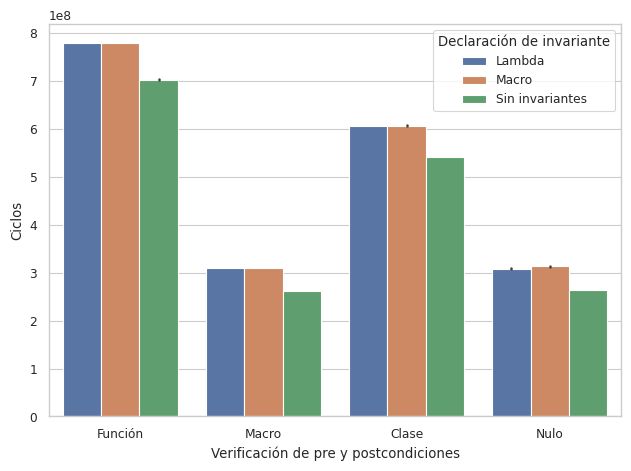

In [13]:
barplot = sns.barplot(df, x="Asercion", y="ciclos", hue="Declaración de invariante")
plt.ylabel("Ciclos")
plt.xlabel("Verificación de pre y postcondiciones")
plt.tight_layout()
plt.savefig("benchmarks.png", dpi=1200)
plt.show()

[779104659.445, 310497389.819, 606820674.769, 308770919.169, 779663200.543, 310484387.882, 606865014.87, 312979755.735, 702736555.449, 261926487.525, 542116002.732, 263641894.399, 0, 0, 0]


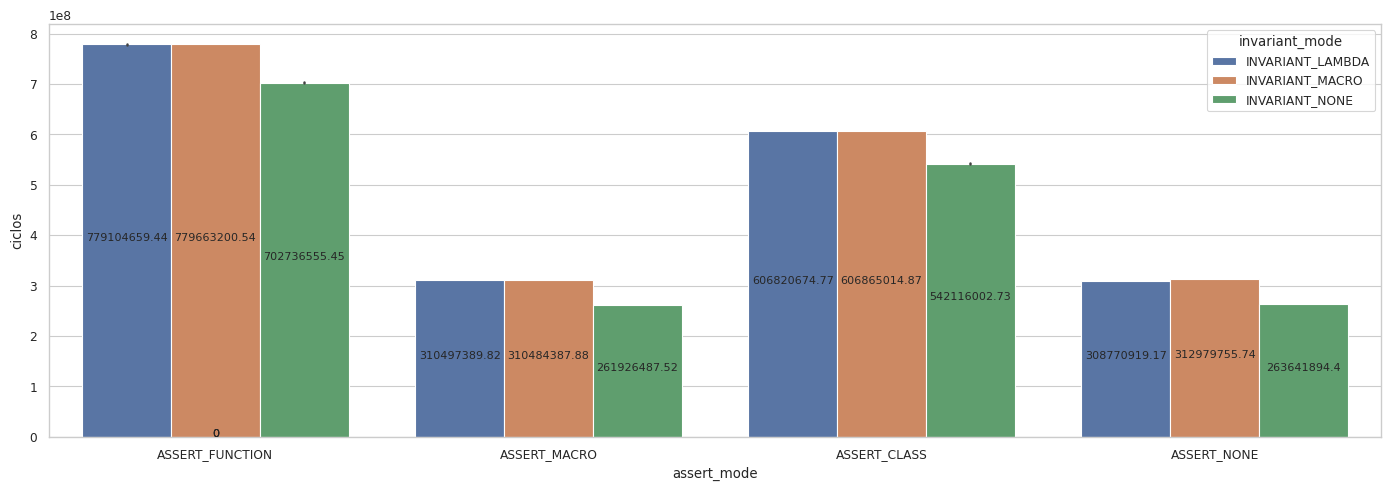

In [6]:
plt.figure(figsize=(14, 5))
barplot = sns.barplot(data=df, x="assert_mode", y="ciclos", hue="invariant_mode")

# Obtener las alturas de las barras
bar_heights = [p.get_height() for p in barplot.patches]

# Obtener las posiciones x de las barras
bar_positions = [p.get_x() + p.get_width() / 2. for p in barplot.patches]

print(bar_heights)

# Agregar las etiquetas a las barras
for i in range(len(bar_heights)):
    plt.text(bar_positions[i], bar_heights[i]/2 + 0.1, round(bar_heights[i], 2), ha='center', fontsize=8)

# Ajustar el diseño
plt.tight_layout()

plt.show()


[779104659.445, 310497389.819, 606820674.769, 308770919.169, 779663200.543, 310484387.882, 606865014.87, 312979755.735, 702736555.449, 261926487.525, 542116002.732, 263641894.399, 0, 0, 0]


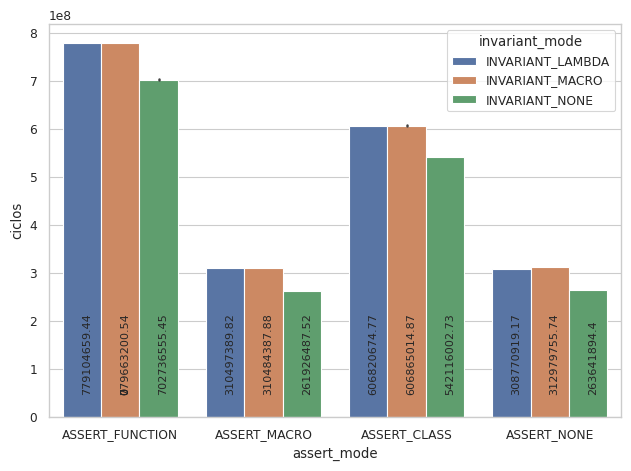

In [7]:
# plt.figure(figsize=(14, 5))
barplot = sns.barplot(data=df, x="assert_mode", y="ciclos", hue="invariant_mode")

# Obtener las alturas de las barras
bar_heights = [p.get_height() for p in barplot.patches]

# Obtener las posiciones x de las barras
bar_positions = [p.get_x() + p.get_width() / 2. for p in barplot.patches]

print(bar_heights)

# Agregar las etiquetas a las barras
for i in range(len(bar_heights)):
    # plt.text(bar_positions[i], bar_heights[i]/2 + 0.1, round(bar_heights[i], 2), ha='right', fontsize=8, rotation=90)
    plt.text(bar_positions[i], 50000000, round(bar_heights[i], 2), ha='left', fontsize=8, rotation=90)

# Ajustar el diseño
plt.tight_layout()

plt.show()

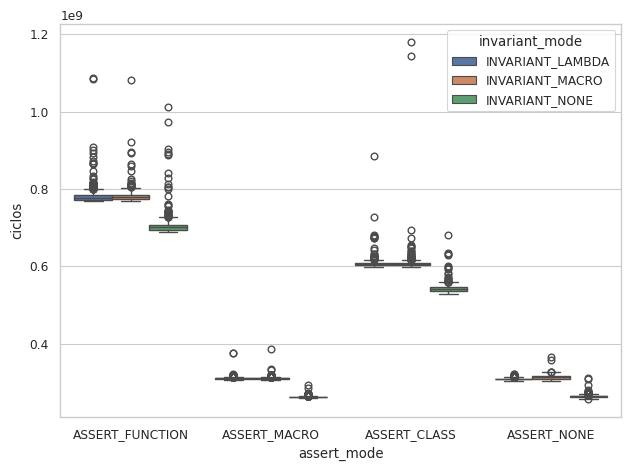

In [8]:
sns.boxplot(df, x="assert_mode", y="ciclos", hue="invariant_mode")
plt.tight_layout()

In [9]:
print(df_grouped.to_markdown())

|    | assert_mode     | invariant_mode   |      ciclos |
|---:|:----------------|:-----------------|------------:|
|  0 | ASSERT_CLASS    | INVARIANT_LAMBDA | 6.06821e+08 |
|  1 | ASSERT_CLASS    | INVARIANT_MACRO  | 6.06865e+08 |
|  2 | ASSERT_CLASS    | INVARIANT_NONE   | 5.42116e+08 |
|  3 | ASSERT_FUNCTION | INVARIANT_LAMBDA | 7.79105e+08 |
|  4 | ASSERT_FUNCTION | INVARIANT_MACRO  | 7.79663e+08 |
|  5 | ASSERT_FUNCTION | INVARIANT_NONE   | 7.02737e+08 |
|  6 | ASSERT_MACRO    | INVARIANT_LAMBDA | 3.10497e+08 |
|  7 | ASSERT_MACRO    | INVARIANT_MACRO  | 3.10484e+08 |
|  8 | ASSERT_MACRO    | INVARIANT_NONE   | 2.61926e+08 |
|  9 | ASSERT_NONE     | INVARIANT_LAMBDA | 3.08771e+08 |
| 10 | ASSERT_NONE     | INVARIANT_MACRO  | 3.1298e+08  |
| 11 | ASSERT_NONE     | INVARIANT_NONE   | 2.63642e+08 |


In [10]:
print(df_grouped.to_latex())

\begin{tabular}{lllr}
\toprule
 & assert_mode & invariant_mode & ciclos \\
\midrule
0 & ASSERT_CLASS & INVARIANT_LAMBDA & 606820674.769000 \\
1 & ASSERT_CLASS & INVARIANT_MACRO & 606865014.870000 \\
2 & ASSERT_CLASS & INVARIANT_NONE & 542116002.732000 \\
3 & ASSERT_FUNCTION & INVARIANT_LAMBDA & 779104659.445000 \\
4 & ASSERT_FUNCTION & INVARIANT_MACRO & 779663200.543000 \\
5 & ASSERT_FUNCTION & INVARIANT_NONE & 702736555.449000 \\
6 & ASSERT_MACRO & INVARIANT_LAMBDA & 310497389.819000 \\
7 & ASSERT_MACRO & INVARIANT_MACRO & 310484387.882000 \\
8 & ASSERT_MACRO & INVARIANT_NONE & 261926487.525000 \\
9 & ASSERT_NONE & INVARIANT_LAMBDA & 308770919.169000 \\
10 & ASSERT_NONE & INVARIANT_MACRO & 312979755.735000 \\
11 & ASSERT_NONE & INVARIANT_NONE & 263641894.399000 \\
\bottomrule
\end{tabular}

